In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x0 = 0.
r = .5

alpha = 1
deflation = lambda x: (np.exp(-alpha/(r**2-np.linalg.norm(x-x0)**2) + alpha/r**2) if np.linalg.norm(x-x0)<r else 0)
x = np.arange(x0-3*r, x0+3*r, 1e-5)
y = np.array([deflation(z) for z in x])

/home/elliott/anaconda3/envs/hgdlEnv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/elliott/anaconda3/envs/hgdlEnv/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


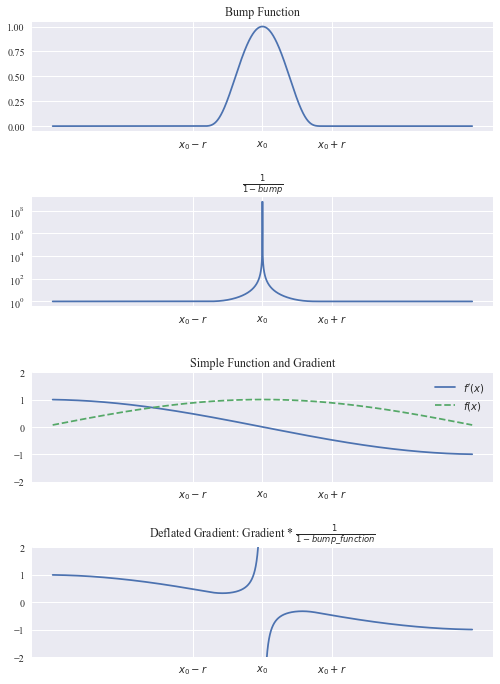

In [8]:
mpl.style.use('seaborn')
a4_size = (8.27, 11.69)
my_size = a4_size[0]-4, a4_size[1]-4 # leave room at bottom for text
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(4, 1, figsize=a4_size)
plt.subplots_adjust(hspace=0.6)

plt.subplot(411)
plt.title('Bump Function')
plt.plot(x, y)
plt.xticks([x0-r, x0, x0+r], [r'$x_0-r$', r'$x_0$', r'$x_0+r$'])

plt.subplot(412)
plt.yscale('log')
plt.plot(x, 1./(1-y))
plt.xticks([x0-r, x0, x0+r], [r'$x_0-r$', r'$x_0$', r'$x_0+r$'])
plt.yticks(10**np.arange(9)[::2])
plt.title(r"$\frac{1}{1-bump}$")

f = np.cos
f_p = lambda x: -1*np.sin(x)
plt.subplot(413)
plt.plot(x, f_p(x), label=r"$f'(x)$")
plt.plot(x, f(x),  ls='--', label=r'$f(x)$')
plt.xticks([x0-r, x0, x0+r], [r'$x_0-r$', r'$x_0$', r'$x_0+r$'])
plt.yticks(np.arange(-2,3,1).astype(int))
plt.legend()
plt.title('Simple Function and Gradient')

#"""
plt.subplot(414)
plt.plot(x, f_p(x)/(1-y))
plt.xticks([x0-r, x0, x0+r], [r'$x_0-r$', r'$x_0$', r'$x_0+r$'])
plt.ylim(-2, 2)
plt.title(r'Deflated Gradient: Gradient * $\frac{1}{1-bump\_function}$')

plt.savefig('bump',  bbox_inches = 'tight', pad_inches = 0, dpi=900)